In [1]:
import cv2
# from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def cv2_imshow(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [3]:
cv2.__version__

'4.7.0'

In [4]:
# !git clone https://github.com/matzim95/ML-datasets

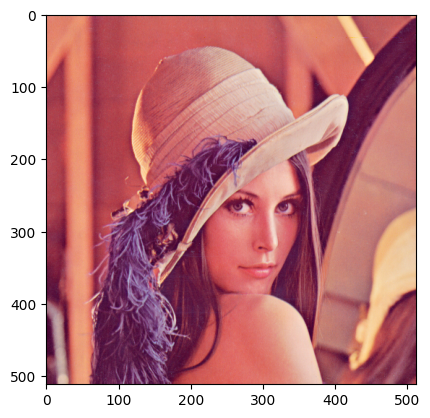

In [5]:
img = cv2.imread('ML-datasets/images/lena.png')
cv2_imshow(img)

# Wydobycie cech

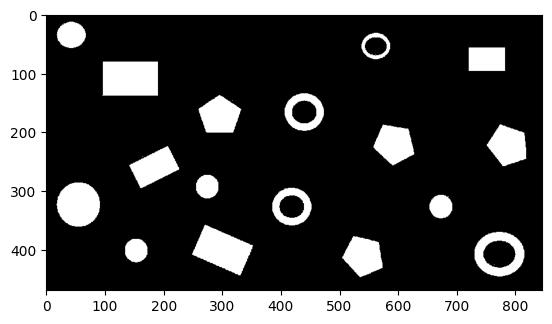

In [8]:
shapes = cv2.imread('ML-datasets/images/contours.png')
gray = cv2.cvtColor(shapes, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

In [9]:
thresh

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 5  1  3 -1]
  [-1 -1  4  2]
  [-1 -1 -1  3]
  [ 6  2 -1 -1]
  [ 7  5 -1 -1]
  [ 9  6  8 -1]
  [-1 -1 -1  7]
  [10  7 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [15 13 -1 -1]
  [16 14 -1 -1]
  [17 15 -1 -1]
  [19 16 18 -1]
  [-1 -1 -1 17]
  [20 17 -1 -1]
  [21 19 -1 -1]
  [24 20 22 -1]
  [-1 -1 23 21]
  [-1 -1 -1 22]
  [-1 21 -1 -1]]]


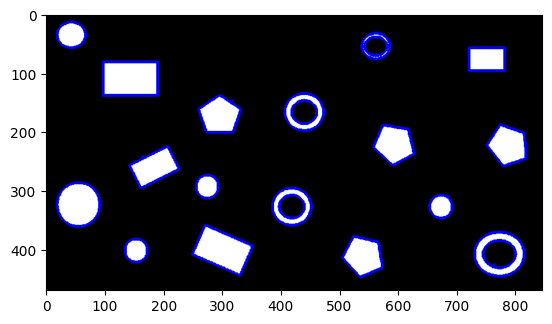

In [10]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(hierarchy)
img_with_contours = cv2.drawContours(shapes, contours, -1, (255,0,0), 3)
cv2_imshow(img_with_contours)

In [11]:
contours

(array([[[147, 383]],
 
        [[146, 384]],
 
        [[145, 384]],
 
        [[143, 386]],
 
        [[142, 386]],
 
        [[140, 388]],
 
        [[139, 388]],
 
        [[139, 389]],
 
        [[137, 391]],
 
        [[137, 392]],
 
        [[136, 393]],
 
        [[136, 394]],
 
        [[135, 395]],
 
        [[135, 409]],
 
        [[136, 410]],
 
        [[136, 411]],
 
        [[137, 412]],
 
        [[137, 413]],
 
        [[139, 415]],
 
        [[139, 416]],
 
        [[140, 416]],
 
        [[142, 418]],
 
        [[143, 418]],
 
        [[146, 421]],
 
        [[150, 421]],
 
        [[151, 422]],
 
        [[156, 422]],
 
        [[157, 421]],
 
        [[160, 421]],
 
        [[161, 420]],
 
        [[162, 420]],
 
        [[164, 418]],
 
        [[165, 418]],
 
        [[170, 413]],
 
        [[170, 411]],
 
        [[172, 409]],
 
        [[172, 396]],
 
        [[171, 395]],
 
        [[171, 394]],
 
        [[170, 393]],
 
        [[170, 392]],
 
        [[169, 3

In [12]:
# odrzucamy kontury wewnętrzne, bierzemy informacje o "potomkach"

filtered_contours = []
has_a_child = []

for contour, h in zip(contours, hierarchy[0]):
  if h[3] == -1:
    filtered_contours.append(contour)
    if h[2] != -1:
      has_a_child.append(1)
    else:
      has_a_child.append(0)

# zbieranie cech

features_list = []

for contour, child in zip(filtered_contours, has_a_child):
  moments = cv2.moments(contour)
  hu_moments = cv2.HuMoments(moments)

  area = cv2.contourArea(contour)
  lenght = cv2.arcLength(contour, True)

  if lenght > 0:
    features = {x: hu[0] for x, hu in enumerate(hu_moments)}
    features['circularity'] = 4 * np.pi * area / lenght ** 2
    features['has_child'] = child
    features_list.append(features)

print(features_list)

[{0: 0.15941289582785556, 1: 3.252408619732467e-05, 2: 5.27642316387083e-07, 3: 5.635438336936336e-10, 4: -6.943865474783207e-18, 5: -3.0071619764965666e-12, 6: 6.7981983850572304e-18, 'circularity': 0.8794407818387552, 'has_child': 0}, {0: 0.16246557636114178, 1: 0.00021766173596225863, 2: 5.374479070567391e-08, 3: 2.7589286043710888e-09, 4: 2.1617391565513796e-17, 5: 3.7981051523716506e-11, 6: 2.571642317728819e-17, 'circularity': 0.7583561388790683, 'has_child': 0}, {0: 0.16039593296315563, 1: 0.00038712998094650783, 2: 4.896544414008128e-08, 3: 1.585926554761691e-10, 4: -3.7591601239780414e-19, 5: -2.704029662668077e-12, 6: 2.323868362383466e-19, 'circularity': 0.8468567085231268, 'has_child': 1}, {0: 0.18678454957080692, 1: 0.007090489465299892, 2: 8.544153097388266e-09, 3: 2.206657045954576e-09, 4: -7.492762161113115e-19, 5: -7.334204476379182e-11, 6: 9.55223059676351e-18, 'circularity': 0.6388592306493681, 'has_child': 0}, {0: 0.15931731560927564, 1: 1.5564326367967728e-05, 2: 7

In [13]:
import pandas as pd

pd.options.display.float_format = '{:,.2f}'.format
df = pd.DataFrame(features_list)
df

,0,1,2,3,4,5,6,circularity,has_child
0,0.16,0.00,0.00,0.00,-0.00,-0.00,0.00,0.88,0
1,0.16,0.00,0.00,0.00,0.00,0.00,0.00,0.76,0
2,0.16,0.00,0.00,0.00,-0.00,-0.00,0.00,0.85,1
3,0.19,0.01,0.00,0.00,-0.00,-0.00,0.00,0.64,0
4,0.16,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.83,0
5,0.16,0.00,0.00,0.00,0.00,0.00,-0.00,0.88,1
6,0.16,0.00,0.00,0.00,-0.00,-0.00,0.00,0.86,0
7,0.16,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.89,0
8,0.19,0.01,0.00,0.00,-0.00,-0.00,0.00,0.64,0
9,0.16,0.00,0.00,0.00,-0.00,0.00,0.00,0.76,0


In [14]:
#klasteryzacja
from sklearn import preprocessing
from sklearn.cluster import KMeans

#normalizacja
x = df.values 
normalizer = preprocessing.Normalizer()
x_scaled = normalizer.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [15]:
df

,0,1,2,3,4,5,6,7,8
0,0.18,0.00,0.00,0.00,-0.00,-0.00,0.00,0.98,0.00
1,0.21,0.00,0.00,0.00,0.00,0.00,0.00,0.98,0.00
2,0.12,0.00,0.00,0.00,-0.00,-0.00,0.00,0.64,0.76
3,0.28,0.01,0.00,0.00,-0.00,-0.00,0.00,0.96,0.00
4,0.19,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.98,0.00
5,0.12,0.00,0.00,0.00,0.00,0.00,-0.00,0.66,0.75
6,0.18,0.00,0.00,0.00,-0.00,-0.00,0.00,0.98,0.00
7,0.18,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.98,0.00
8,0.28,0.01,0.00,0.00,-0.00,-0.00,0.00,0.96,0.00
9,0.21,0.00,0.00,0.00,-0.00,0.00,0.00,0.98,0.00


In [16]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df)


/home/edzia/PWr/sda_classification/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

[3 1 0 2 3 0 3 3 2 1 1 1 0 2 1 0 3]


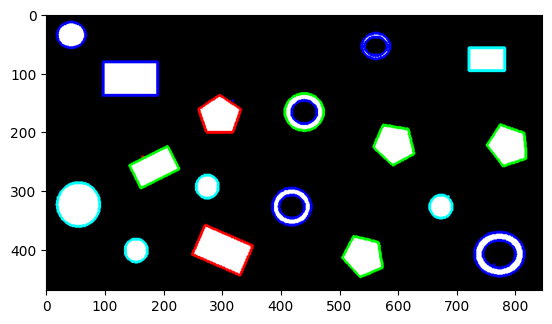

In [17]:

print(kmeans.labels_)

colors =[(255,0,0), (0,255,0), (0,0,255), (255,255,0)]
for contour, label in zip(filtered_contours, kmeans.labels_):
  classified = cv2.drawContours(shapes, [contour], 0, colors[label], 3)

cv2_imshow(classified)

In [20]:
filtered_contours

[array([[[147, 383]],
 
        [[146, 384]],
 
        [[145, 384]],
 
        [[143, 386]],
 
        [[142, 386]],
 
        [[140, 388]],
 
        [[139, 388]],
 
        [[139, 389]],
 
        [[137, 391]],
 
        [[137, 392]],
 
        [[136, 393]],
 
        [[136, 394]],
 
        [[135, 395]],
 
        [[135, 409]],
 
        [[136, 410]],
 
        [[136, 411]],
 
        [[137, 412]],
 
        [[137, 413]],
 
        [[139, 415]],
 
        [[139, 416]],
 
        [[140, 416]],
 
        [[142, 418]],
 
        [[143, 418]],
 
        [[146, 421]],
 
        [[150, 421]],
 
        [[151, 422]],
 
        [[156, 422]],
 
        [[157, 421]],
 
        [[160, 421]],
 
        [[161, 420]],
 
        [[162, 420]],
 
        [[164, 418]],
 
        [[165, 418]],
 
        [[170, 413]],
 
        [[170, 411]],
 
        [[172, 409]],
 
        [[172, 396]],
 
        [[171, 395]],
 
        [[171, 394]],
 
        [[170, 393]],
 
        [[170, 392]],
 
        [[169, 3

In [18]:
kmeans.labels_

array([3, 1, 0, 2, 3, 0, 3, 3, 2, 1, 1, 1, 0, 2, 1, 0, 3], dtype=int32)

In [19]:
df

,0,1,2,3,4,5,6,7,8
0,0.18,0.00,0.00,0.00,-0.00,-0.00,0.00,0.98,0.00
1,0.21,0.00,0.00,0.00,0.00,0.00,0.00,0.98,0.00
2,0.12,0.00,0.00,0.00,-0.00,-0.00,0.00,0.64,0.76
3,0.28,0.01,0.00,0.00,-0.00,-0.00,0.00,0.96,0.00
4,0.19,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.98,0.00
5,0.12,0.00,0.00,0.00,0.00,0.00,-0.00,0.66,0.75
6,0.18,0.00,0.00,0.00,-0.00,-0.00,0.00,0.98,0.00
7,0.18,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.98,0.00
8,0.28,0.01,0.00,0.00,-0.00,-0.00,0.00,0.96,0.00
9,0.21,0.00,0.00,0.00,-0.00,0.00,0.00,0.98,0.00
